<h1> Project: Sleep Quality Data Analysis </h1>
<h2> Names: Jingzhi Yang, Wenhan Bo </h2>
<h3><a href="https://yship1002.github.io">https://yship1002.github.io</a></h3>

<h1 style="text-align:left">Project Goal</h1>
<p>We plan to use two public sleep quality datasets we found to answer the following questions through the extraction, analysis, and visualization of data.</p>
<p>1. Which factors have the biggest impact on sleep quality?</p>
<p>2. What can we do to improve sleep quality in this modern society? </p>

<h1 style="text-align:left">Datasets</h1>
<p>We believed the following two datasets have all the necessary information we need in order to answer the questions posted above. We also provided descriptions of our datasets as well as how we are going to use them.</p>
<p>Dataset 1: <a href="https://www.kaggle.com/datasets/arashnic/fitbit">FitBit Fitness Tracker dataset</a></p>
<p>This is a public dataset from Kaggle where 30 FitBit users consented to submit their personal fitness data for analysis. Fitbit trackers on these participants record a lot of useful data including sleep quality, sleep during the day, daily steps, weights, heartrates and daily calories consumption. This dataset is a series of several CSV files where each CSV file stores one feature of fitness data. Each participant is labeled with a unique ID in those CSV files which makes it easier for us to correlate sleep behaviors with daily activities by joining the tables to answer our project questions.</p>
<p>Dataset 2: <a href="https://www.kaggle.com/datasets/danagerous/sleep-data">Sleep Cycle iOS App dataset</a></p>
<p>YOUR REASONS TO ANALYZE THIS DATASET! </p>

<h1 style="text-align:left">Collaboration Plan</h1>
<p>Since we will be working with two different data sets, it is natural to divide the work into half. Jingzhi will be working on FitBit Fitness Tracker dataset while Wenhan will be working on Sleep Cycle iOS App dataset. Both datasets come from Kaggle. We will be using python as our programming language and panda,numpy,matplotlib packages will be used to analyze and visualize the data. We plan to meet twice every week, one in Wednesday morning and the other in Sunday evening to discuss our progress and share our findings. We agreed to set up a google doc to share useful resources as well as any interesting findings worth mentioning in our weekly meetings.</p>

<h1 style="text-align:left">Exploratory Data Analysis</h1>
<p>The first step is to load the data as panda dataframe.</p>

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
files=os.listdir("../data/FitBitData")
df_list={file[:file.find("_")]:pd.read_csv("../data/FitBitData/"+file) for file in files}
df_list.keys()

dict_keys(['minuteIntensitiesWide', 'dailyActivity', 'sleepDay', 'heartrate', 'minuteIntensitiesNarrow', 'minuteMETsNarrow', 'hourlySteps', 'hourlyIntensities', 'dailyCalories', 'hourlyCalories', 'minuteSleep', 'minuteCaloriesNarrow', 'dailySteps', 'minuteCaloriesWide', 'minuteStepsNarrow', 'minuteStepsWide', 'weightLogInfo', 'dailyIntensities'])

<p>We started with sleepDay data and reformat the date column in order to join other tables later</p>

In [2]:
sleepDay=df_list["sleepDay"]
sleepDay.rename(columns={"SleepDay":'ActivityDay'},inplace=True)
sleepDay['ActivityDay']=[x[:x.find(" ")] for x in sleepDay['ActivityDay']]

<h3 style="text-align:left">How long does it take to fall asleep on avg?</h3>
<p>We subtracted total time spent on bed by total time falling asleep to get the time people spend on bed before falling asleep</p>

In [3]:
sleepDay['MinutesBeforeSleep']=sleepDay['TotalTimeInBed']-sleepDay['TotalMinutesAsleep']
sleepDay['MinutesBeforeSleep'].describe()

count    413.000000
mean      39.171913
std       46.570095
min        0.000000
25%       17.000000
50%       25.000000
75%       40.000000
max      371.000000
Name: MinutesBeforeSleep, dtype: float64

Well it looks like people on average spend 40 mins on bed before sleep. The maximum time before bed is 371 mins (Netflix??? Disney??? Hulu???)

<h3 style="text-align:left">Does getting more steps increases sleeping time?</h3>
<p>We plot daily steps against sleep minutes to see if there is positive correlation. Before plotting we need to merge sleepDay table with dailyStep table</p>

Text(0, 0.5, 'SleepMinutes')

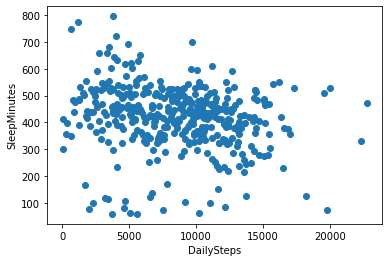

In [6]:
sleep_step=sleepDay.merge(df_list['dailySteps'],on=["Id","ActivityDay"],how="inner")
plt.scatter(sleep_step['StepTotal'],sleep_step['TotalMinutesAsleep'])
plt.xlabel("DailySteps")
plt.ylabel("SleepMinutes")

<p>It doesn't appear that getting more daily steps helps sleeping time. In fact, there appears to be a weak negative correlation. Running a correlation matrix support our observation based on the graph</p>

In [8]:
sleep_step.corr()

Id  TotalSleepRecords  TotalMinutesAsleep  \
Id                  1.000000          -0.012552            0.080117   
TotalSleepRecords  -0.012552           1.000000            0.165912   
TotalMinutesAsleep  0.080117           0.165912            1.000000   
TotalTimeInBed      0.002112           0.172917            0.930457   
MinutesBeforeSleep -0.197831           0.050317           -0.001762   
StepTotal           0.011345          -0.162490           -0.186866   

                    TotalTimeInBed  MinutesBeforeSleep  StepTotal  
Id                        0.002112           -0.197831   0.011345  
TotalSleepRecords         0.172917            0.050317  -0.162490  
TotalMinutesAsleep        0.930457           -0.001762  -0.186866  
TotalTimeInBed            1.000000            0.364760  -0.164060  
MinutesBeforeSleep        0.364760            1.000000   0.027108  
StepTotal                -0.164060            0.027108   1.000000